# Project Name ---> HeartGuard Predictor
### Logistic Regression (Classification) Basic model 

In [2]:
# importing requred libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score , classification_report , confusion_matrix , roc_auc_score , roc_curve

In [3]:
# loading datsets CSV

file_path = r"C:\Users\Ravichandran\OneDrive\Desktop\logistic regression projects\heart_disease_uci.csv"
heart_data = pd.read_csv(file_path)


In [4]:
heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
heart_data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
# checking unique values of target label
heart_data['num'].value_counts() # it has 4 unique count so we need to convert into binary for better classifiaction


num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
heart_data.drop(['id','dataset'] , axis=1, inplace=True)

In [10]:
heart_data.dropna(subset=['trestbps', 'chol', 'fbs','restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',] , axis=0 , inplace=True)

In [11]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,47,Male,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [12]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
# Checking columns datatypes  age , trestbps , chol , thalch , oldpeak , ca 
heart_data.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

## Encoding all categorical columns

In [14]:
future_category = ['sex' ,'cp','fbs','restecg','exang','slope','thal']
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [15]:
# Normalizing original future data
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
# adding column Transformers for encoded colunms
ct = ColumnTransformer(transformers=[
    ('num',  'passthrough', numerical_features ),
    ('cat' , one_hot_encoder, future_category )]) # we have to maintain order Name, Transformer, Colum

# safe method: Separating  features (X) and target (y) first
droping_target = heart_data.drop(columns=['num'])  # Everything except the target

ct.set_output(transform='pandas')

# Now process ONLY the features
encoded_heart_data = ct.fit_transform(droping_target)  # <-- Pass droping_target, not the whole DataFrame
encoded_heart_data.head()

,num__age,num__trestbps,num__chol,num__thalch,num__oldpeak,num__ca,cat__sex_Female,cat__sex_Male,cat__cp_asymptomatic,cat__cp_atypical angina,...,cat__restecg_normal,cat__restecg_st-t abnormality,cat__exang_False,cat__exang_True,cat__slope_downsloping,cat__slope_flat,cat__slope_upsloping,cat__thal_fixed defect,cat__thal_normal,cat__thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,67,160.0,286.0,108.0,1.5,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,67,120.0,229.0,129.0,2.6,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130.0,250.0,187.0,3.5,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41,130.0,204.0,172.0,1.4,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
# assigning both future and target columns into new dataset called complete_heart_data
# target = means "create a new column named 'target'".
complete_heart_data = encoded_heart_data.assign(target=heart_data['num']) 


In [17]:
# Convert to binary: 0 = no disease, 1-4 = disease
complete_heart_data['target_binary'] = (complete_heart_data['target'] > 0).astype(int)
# HIGH RISK (Probably 1 - heart disease present) 
#becouse in disease 1 - 4 is diffrent conditions so this are  considered as disease
# Prediction: LOW RISK (Probably 0 - healthy) 


In [18]:
# Checking ist converted to binary
complete_heart_data['target_binary'] 

0      0
1      1
2      1
3      0
4      0
      ..
299    1
300    1
301    1
508    1
748    1
Name: target_binary, Length: 299, dtype: int32

In [19]:
# droping existing target
complete_heart_data.drop(['target'] , axis=1 , inplace=True)

In [20]:
complete_heart_data.columns

Index(['num__age', 'num__trestbps', 'num__chol', 'num__thalch', 'num__oldpeak',
       'num__ca', 'cat__sex_Female', 'cat__sex_Male', 'cat__cp_asymptomatic',
       'cat__cp_atypical angina', 'cat__cp_non-anginal',
       'cat__cp_typical angina', 'cat__fbs_False', 'cat__fbs_True',
       'cat__restecg_lv hypertrophy', 'cat__restecg_normal',
       'cat__restecg_st-t abnormality', 'cat__exang_False', 'cat__exang_True',
       'cat__slope_downsloping', 'cat__slope_flat', 'cat__slope_upsloping',
       'cat__thal_fixed defect', 'cat__thal_normal',
       'cat__thal_reversable defect', 'target_binary'],
      dtype='object')

In [21]:
complete_heart_data.dtypes

num__age                           int64
num__trestbps                    float64
num__chol                        float64
num__thalch                      float64
num__oldpeak                     float64
num__ca                          float64
cat__sex_Female                  float64
cat__sex_Male                    float64
cat__cp_asymptomatic             float64
cat__cp_atypical angina          float64
cat__cp_non-anginal              float64
cat__cp_typical angina           float64
cat__fbs_False                   float64
cat__fbs_True                    float64
cat__restecg_lv hypertrophy      float64
cat__restecg_normal              float64
cat__restecg_st-t abnormality    float64
cat__exang_False                 float64
cat__exang_True                  float64
cat__slope_downsloping           float64
cat__slope_flat                  float64
cat__slope_upsloping             float64
cat__thal_fixed defect           float64
cat__thal_normal                 float64
cat__thal_revers

In [22]:
complete_heart_data.isnull().sum()

num__age                         0
num__trestbps                    0
num__chol                        0
num__thalch                      0
num__oldpeak                     0
num__ca                          0
cat__sex_Female                  0
cat__sex_Male                    0
cat__cp_asymptomatic             0
cat__cp_atypical angina          0
cat__cp_non-anginal              0
cat__cp_typical angina           0
cat__fbs_False                   0
cat__fbs_True                    0
cat__restecg_lv hypertrophy      0
cat__restecg_normal              0
cat__restecg_st-t abnormality    0
cat__exang_False                 0
cat__exang_True                  0
cat__slope_downsloping           0
cat__slope_flat                  0
cat__slope_upsloping             0
cat__thal_fixed defect           0
cat__thal_normal                 0
cat__thal_reversable defect      0
target_binary                    0
dtype: int64

## Data visualisation using a swarm plot

C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_5636\963945913.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="target_binary", y="num__age", data=complete_heart_data , palette=data_out)


<Axes: xlabel='target_binary', ylabel='num__age'>

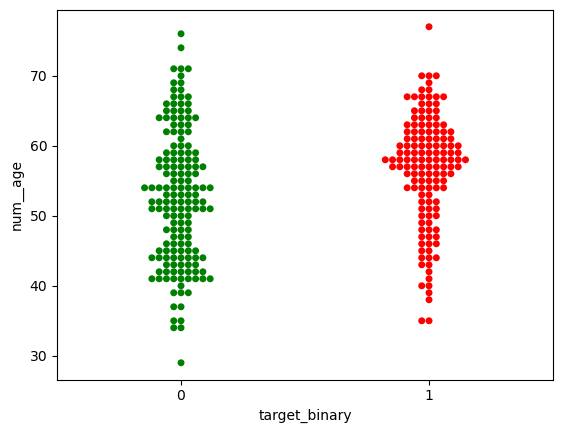

In [23]:
# swarn plot
data_out = {
    '0' : 'green',
    '1' : 'red'
}

sns.swarmplot(x="target_binary", y="num__age", data=complete_heart_data , palette=data_out)


# Training Logistic model

In [24]:
 
# IN THIS PROJECT I FACED SOME PROBLEMS LIKE IN MY DATASET I HAVE DIFFERENT CATEGORIES LIKE NUMERIC AND CATEGORICAL,
# BUT THATS NOT THE ACTUAL PROBLEM THE PROBELM IS AFTER ENCODED CATERGORIES I HAVE TO MERGE BOTH COLUMNS NUMERIC AND ENCODED COLUMNS 

#  defining numeric features
numerical_features = [
    'num__age', 'num__trestbps', 'num__chol',
    'num__thalch', 'num__oldpeak', 'num__ca']

#  full futures (both numeric + categorical)
feature_columns = [
    'num__age', 'num__trestbps', 'num__chol', 'num__thalch', 'num__oldpeak',
    'num__ca', 'cat__sex_Female', 'cat__sex_Male',
    'cat__cp_asymptomatic', 'cat__cp_atypical angina',
    'cat__cp_non-anginal', 'cat__cp_typical angina',
    'cat__fbs_False', 'cat__fbs_True',
    'cat__restecg_lv hypertrophy', 'cat__restecg_normal',
    'cat__restecg_st-t abnormality', 'cat__exang_False', 'cat__exang_True',
    'cat__slope_downsloping', 'cat__slope_flat', 'cat__slope_upsloping',
    'cat__thal_fixed defect', 'cat__thal_normal', 'cat__thal_reversable defect']

# build X and y dataframe                        # | his part is important when merging both columns
X = complete_heart_data[feature_columns].copy()  # |
y = complete_heart_data['target_binary']         # |

# train/test split in dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# startify=y means in training and testing set also same ration like 80% , 20%

#  scaling  only numeric features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features]  = scaler.transform(X_test[numerical_features])

In [25]:
X ,y

(     num__age  num__trestbps  num__chol  num__thalch  num__oldpeak  num__ca  \
 0          63          145.0      233.0        150.0           2.3      0.0   
 1          67          160.0      286.0        108.0           1.5      3.0   
 2          67          120.0      229.0        129.0           2.6      2.0   
 3          37          130.0      250.0        187.0           3.5      0.0   
 4          41          130.0      204.0        172.0           1.4      0.0   
 ..        ...            ...        ...          ...           ...      ...   
 299        68          144.0      193.0        141.0           3.4      2.0   
 300        57          130.0      131.0        115.0           1.2      1.0   
 301        57          130.0      236.0        174.0           0.0      1.0   
 508        47          150.0      226.0         98.0           1.5      0.0   
 748        56          120.0      100.0        120.0           1.5      0.0   
 
      cat__sex_Female  cat__sex_Male  

In [35]:
# Spliting data into train and test datasets

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3 , random_state=42)
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')
print("X shape:", X.shape)
print("y shape:", y.shape)

Features:
   num__age  num__trestbps  num__chol  num__thalch  num__oldpeak  num__ca  \
0        63          145.0      233.0        150.0           2.3      0.0   
1        67          160.0      286.0        108.0           1.5      3.0   
2        67          120.0      229.0        129.0           2.6      2.0   
3        37          130.0      250.0        187.0           3.5      0.0   
4        41          130.0      204.0        172.0           1.4      0.0   
5        56          120.0      236.0        178.0           0.8      0.0   
6        62          140.0      268.0        160.0           3.6      2.0   
7        57          120.0      354.0        163.0           0.6      0.0   
8        63          130.0      254.0        147.0           1.4      1.0   
9        53          140.0      203.0        155.0           3.1      0.0   

   cat__sex_Female  cat__sex_Male  cat__cp_asymptomatic  \
0              0.0            1.0                   0.0   
1              0.0      

In [28]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [29]:
# Trainig model 
model = LogisticRegression()
model.fit(X_train , y_train)
print(model)


LogisticRegression()


c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##  Evaluating Model Performance with Plots

In [30]:
prediction  = model.predict(X_test)
print("classification_report :" , classification_report(y_test , prediction))

print("Predicted Values : " , prediction)
print("Actual Values : ", y_test)

print("F1 Score : " , f1_score(y_test , prediction))

# evaluating using confussion matrix
confusion_matrix(y_test , prediction)

classification_report :               precision    recall  f1-score   support

           0       0.81      0.90      0.85        49
           1       0.86      0.76      0.81        41

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

Predicted Values :  [1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1]
Actual Values :  285    1
269    0
165    0
9      1
77     0
      ..
133    0
72     1
15     0
10     0
158    1
Name: target_binary, Length: 90, dtype: int32
F1 Score :  0.8051948051948052


array([[44,  5],
       [10, 31]], dtype=int64)

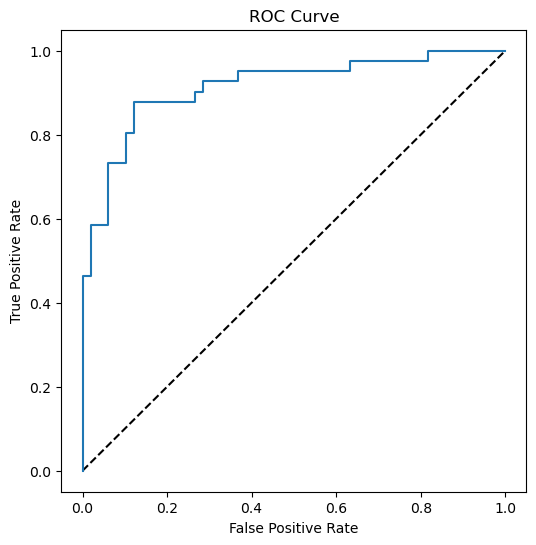

In [31]:
y_score = model.predict_proba(X_test)
fpr , tpr , thresholds  = roc_curve(y_test , y_score[:,1])
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr , tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [32]:
auc = roc_auc_score(y_test,y_score[:,1])
print(auc)

0.9143852663016426


## Testing Model performance by giving new input data

### HIGH RISK (Probably 1 - heart disease present)
### Prediction: LOW RISK (Probably 0 - healthy)

In [33]:
new_data = [[ 0.94,1.21, 0.85, -1.10,  1.80,  1.20, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 
            0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0,  0.0, 0.0,1.0]]  

predict_Heart_Disease = model.predict(new_data)
print("Pridecting Heart Disease :" ,predict_Heart_Disease)
if predict_Heart_Disease==predict_Heart_Disease:
    print("'HIGH RISK' you have to go hospital to checkup")

Pridecting Heart Disease : [1]
'HIGH RISK' you have to go hospital to checkup


c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
new_data_2 = [[-1.20,   # num__age: Younger than average
 -0.50,   # num__trestbps: Normal BP
 -0.30,   # num__chol: Normal cholesterol
  0.90,   # num__thalch: Good max heart rate
 -0.50,   # num__oldpeak: Minimal ST depression
 -0.80,   # num__ca: No vessels colored
  1.0,    # cat__sex_Female: Is female
  0.0,    # cat__sex_Male: Not male
  0.0,    # cat__cp_asymptomatic: Not asymptomatic
  0.0,    # cat__cp_atypical angina: Not atypical
  1.0,    # cat__cp_non-anginal: Non-anginal pain
  0.0,    # cat__cp_typical angina: Not typical
  1.0,    # cat__fbs_False: Fasting blood sugar <= 120
  0.0,    # cat__fbs_True: Not > 120
  0.0,    # cat__restecg_lv hypertrophy: No hypertrophy
  1.0,    # cat__restecg_normal: Normal ECG
  0.0,    # cat__restecg_st-t abnormality: No abnormality
  1.0,    # cat__exang_False: NO exercise angina
  0.0,    # cat__exang_True: Not exercise angina
  0.0,    # cat__slope_downsloping: Not downsloping
  0.0,    # cat__slope_flat: Not flat
  1.0,    # cat__slope_upsloping: Upsloping ST segment
  0.0,    # cat__thal_fixed defect: Not fixed defect
  1.0,    # cat__thal_normal: Normal thalassemia
  0.0]]    # cat__thal_reversable defect: Not reversible defect

predict_Heart_Disease2 = model.predict(new_data_2)
print("predict_Heart_Disease : " ,predict_Heart_Disease2)
if predict_Heart_Disease2==predict_Heart_Disease2:
  print("your healthy, Stay safe")

predict_Heart_Disease :  [0]
your healthy, Stay safe


c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
